In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
df = pd.read_feather("feather.feather")
df.steps.fillna(df.steps.mean(), inplace=True)

,year,month,day,weekday,steps,stars
0,2019,4,15,0,5319.0,0.0
1,2019,4,16,1,6671.0,0.0
2,2019,4,17,2,4378.0,0.0
3,2019,4,18,3,5016.0,0.0
4,2019,4,19,4,3747.0,0.0


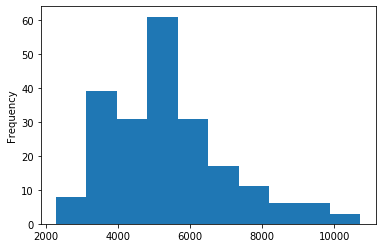

In [9]:
df.steps.plot(kind='hist')

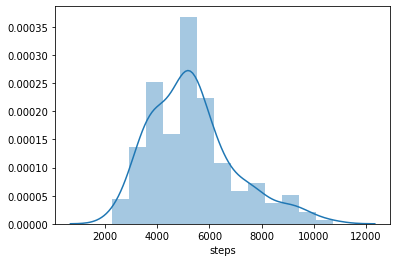

In [10]:
sns.distplot(df.steps)

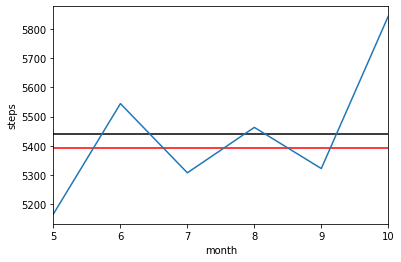

In [35]:
idx = pd.IndexSlice

f = plt.figure()
ax = plt.subplot()
df.groupby("month").mean().loc[idx[5:10],"steps"].plot()
plt.hlines(df.groupby("month").mean().loc[idx[5:10],"steps"].mean(), xmin=5, xmax=10)
plt.hlines(df.groupby("month").mean().loc[idx[5:10],"steps"].median(), xmin=5, xmax=10, color='r')
ax.set_ylabel("steps")
plt.show()


In [46]:
def plotGroupBy(by, header, borne_inf, borne_sup):
    mean = df[header].mean()
    median = df[header].median()
    try:
        idx = pd.IndexSlice
        ax = plt.subplot()
        df.groupby(by).mean().loc[idx[borne_inf:borne_sup], header].plot()
        plt.hlines(mean, xmin=borne_inf, xmax=borne_sup)
        plt.hlines(median, xmin=borne_inf, xmax=borne_sup, color='r')
        ax.set_ylabel(header)
        plt.show()
    except Exception as e:
        print("verifier les noms et l'etendu du groupement")
        print(e)

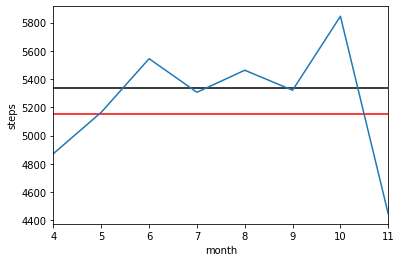

In [74]:
plotGroupBy("month", "steps", 1,12)

In [82]:
lower, upper = 0, 4000

print(df.iloc[108:][(df.steps >= lower) & (df.steps <= upper)].count()[0])


19


C:\Users\tousi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
lower, upper = 4000, 6000

print(df.iloc[108:][(df.steps >= lower) & (df.steps <= upper)].count()[0])


59


C:\Users\tousi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
lower, upper = 6000, 8000

print(df.iloc[108:][(df.steps >= lower) & (df.steps <= upper)].count()[0])
